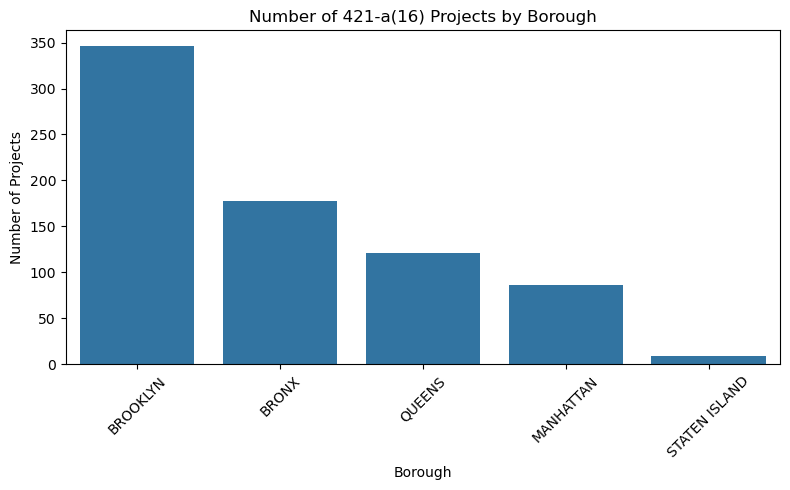

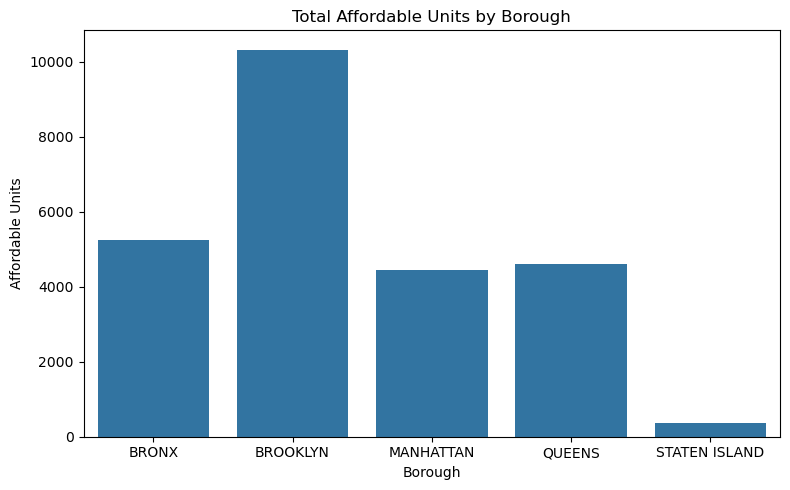

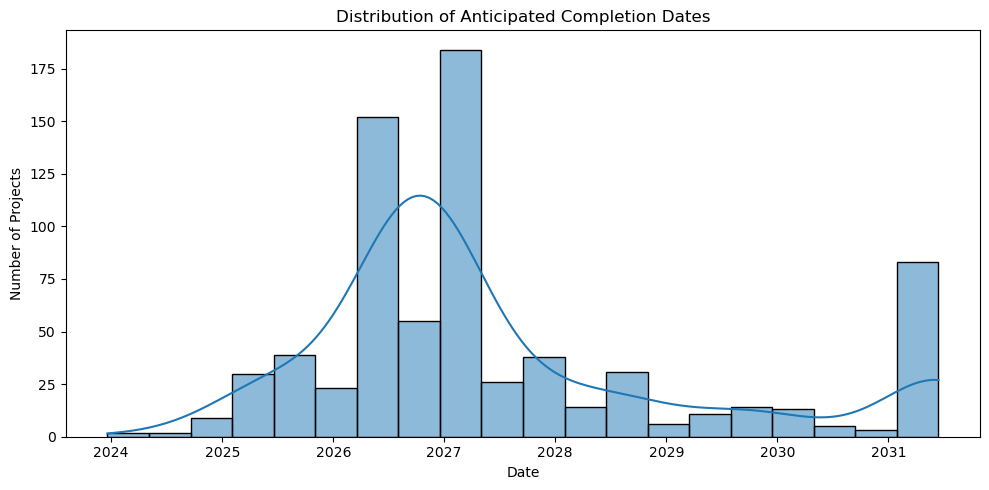

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("421-a_16__Affordable_New_York_Housing_Program_Completion_Extension_-_Letters_of_Intent_20250422.csv")

# Clean column names for easier access
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Convert date columns
df["REPORTED_ANTICIPATED_COMPLETION_DATE"] = pd.to_datetime(df["REPORTED_ANTICIPATED_COMPLETION_DATE"], errors="coerce")

# 1. Total Projects by Borough
borough_counts = df["REPORTED_BOROUGH"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=borough_counts.index, y=borough_counts.values)
plt.title("Number of 421-a(16) Projects by Borough")
plt.ylabel("Number of Projects")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Affordable Units by Borough
affordable_by_borough = df.groupby("REPORTED_BOROUGH")["REPORTED_AFFORDALE_UNITS"].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=affordable_by_borough.index, y=affordable_by_borough.values)
plt.title("Total Affordable Units by Borough")
plt.ylabel("Affordable Units")
plt.xlabel("Borough")
plt.tight_layout()
plt.show()

# 3. Completion Dates Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["REPORTED_ANTICIPATED_COMPLETION_DATE"].dropna(), bins=20, kde=True)
plt.title("Distribution of Anticipated Completion Dates")
plt.xlabel("Date")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()


In [2]:
at_risk = df[
    (pd.to_datetime(df["REPORTED_COMMENCEMENT_DATE"], errors="coerce") < "2022-01-01") &
    (df["REPORTED_ANTICIPATED_COMPLETION_DATE"] > "2030-12-31")
]


In [3]:
df["AFFORDABLE_UNITS_DIFF"] = pd.to_numeric(df["REPORTED_AFFORDALE_UNITS"], errors="coerce") - \
                               pd.to_numeric(df["PRESUMED_BUILDING_AFFORDABLE_UNITS"], errors="coerce")

discrepant_projects = df[df["AFFORDABLE_UNITS_DIFF"].abs() > 10]  # customizable threshold


In [4]:
df["COMPLETION_YEAR"] = df["REPORTED_ANTICIPATED_COMPLETION_DATE"].dt.year
units_by_year = df.groupby("COMPLETION_YEAR")["REPORTED_AFFORDALE_UNITS"].sum()
